In [1]:
import math
import numpy as np
from scipy.stats import poisson
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [10]:
gamma = .9

lamda1_request = 3
lamda1_return  = 3
lamda2_request = 4
lamda2_return  = 2

reward_per_car_rented = 10
cost_per_car_moved = 2

state_min = 0
state_max = 20
poisson_up = 11

action_min = -5
action_max = 5
actions = np.arange(action_min, action_max + 1)

In [11]:
def expected_return(move, V, state1, state2):
    expected_return = 0
    for n_ret1 in range(poisson_up):
        for n_ret2 in range(poisson_up):
            for n_req1 in range(min(poisson_up, state1+1)):
                for n_req2 in range(min(poisson_up, state2+1)):

                    state1_prime = int(state1 + n_ret1 - n_req1 - move)
                    state2_prime = int(state2 + n_ret2 - n_req2 + move)

                    if (state_min <= state1_prime <= state_max) & \
                       (state_min <= state2_prime <= state_max) & \
                       (n_req1 <= state1) & (n_req2 <= state2):

                        p = poisson.pmf(n_ret1, lamda1_return)  * \
                            poisson.pmf(n_ret2, lamda2_return)  * \
                            poisson.pmf(n_req1, lamda1_request) * \
                            poisson.pmf(n_req2, lamda2_request)

                        r = (n_req1 + n_req2) * reward_per_car_rented - \
                            abs(move) * cost_per_car_moved

                        expected_return += p * (r + gamma * V[state1_prime, state2_prime])
                        
    return expected_return

In [12]:
# Policy Evaluation
def policy_evaluation(policy):
    V = np.zeros([policy.shape[0],policy.shape[1]]) 
    delta = 0
    theta = .01
    flag = True

    while flag:
        delta = 0
        for state1 in range(state_max + 1):
            for state2 in range(state_max + 1):
                v = V[state1, state2]
                move = policy[state1, state2]
                V[state1, state2] = expected_return(move, V, state1, state2)
                delta = max(delta, abs(v - V[state1, state2]))

        if delta < theta:
            flag = False
    return V

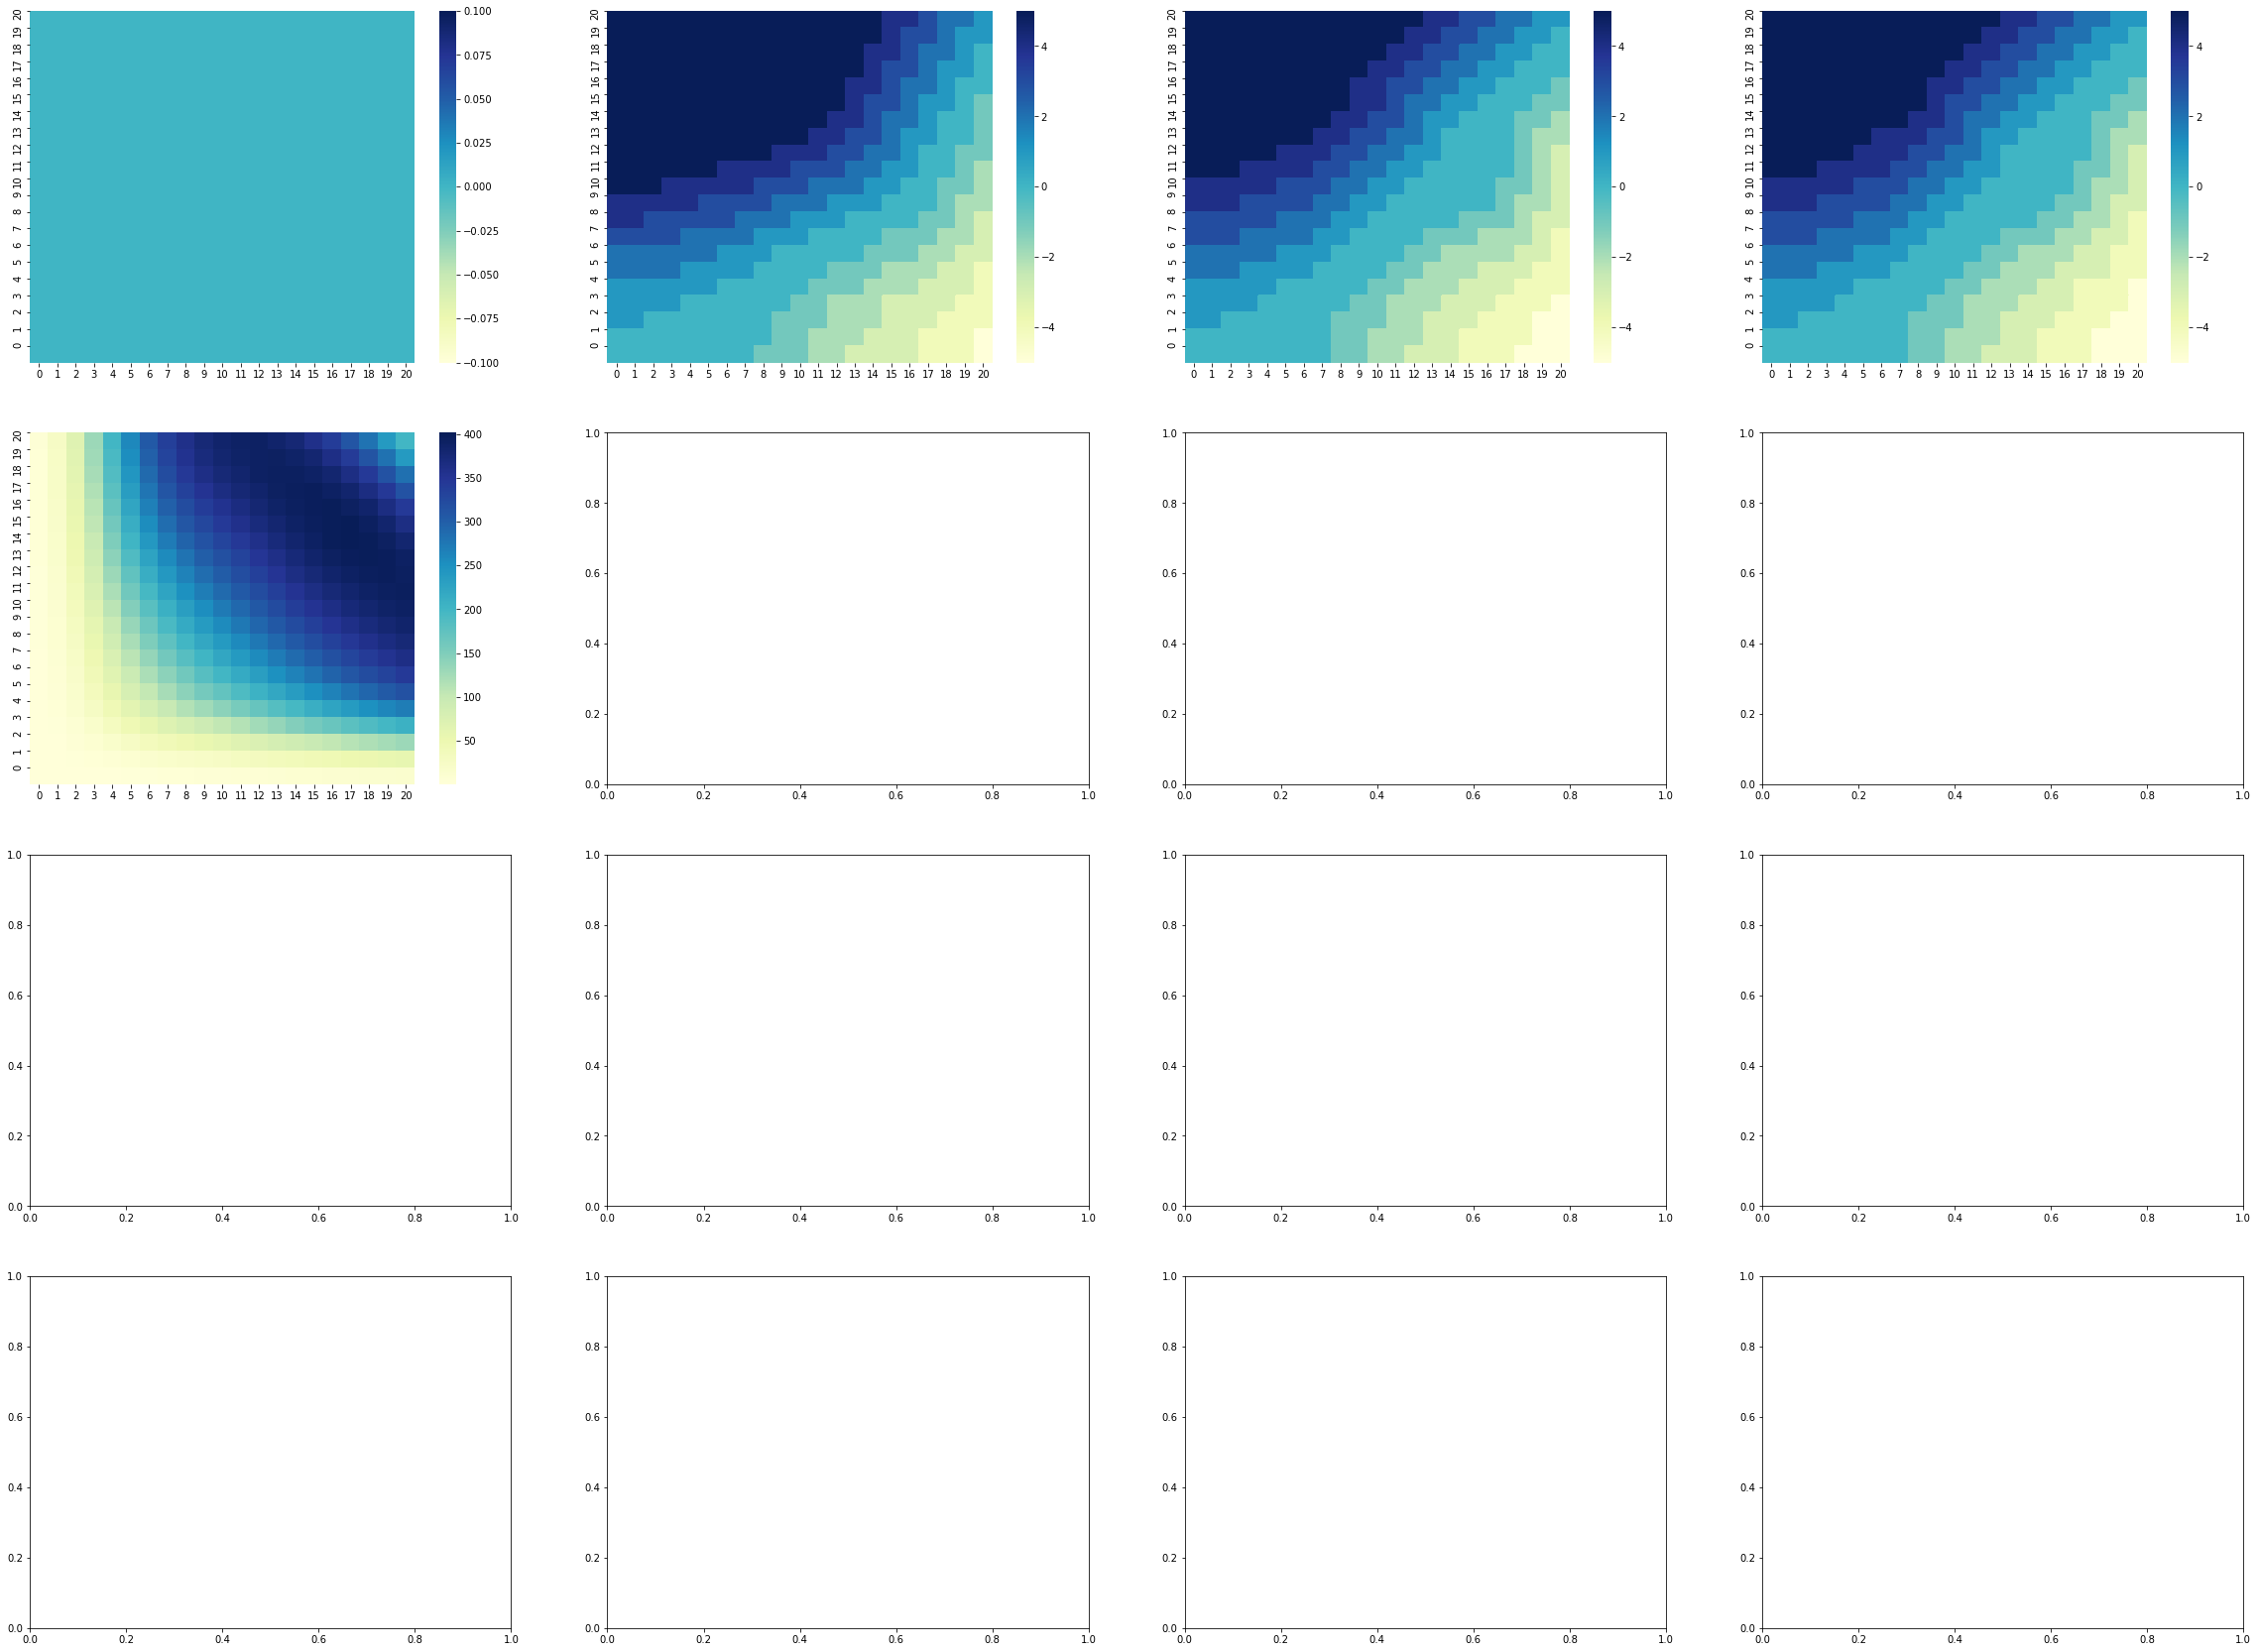

In [13]:
# Policy Improvement
policy = np.zeros([state_max+1,state_max+1]) 
_, axes = plt.subplots(4, 4, figsize=(40, 30))
axes = axes.flatten()
iteration = 0
while True:
    fig = sns.heatmap(np.flipud(policy), cmap="YlGnBu", ax=axes[iteration])
    fig.set_yticks(list(reversed(range(state_max + 1))))
                           
    V = policy_evaluation(policy)
    policy_stable = True
    for state1 in range(state_max + 1):
        for state2 in range(state_max + 1):
            old_action = policy[state1, state2]
            actions_returns = np.zeros(-action_min + action_max + 1)
            for i, action in enumerate(actions):
                actions_returns[i] = expected_return(action, V, state1, state2)
            idx = np.argmax(actions_returns)
            new_action = actions[idx]
            policy[state1, state2] = new_action
            if old_action != new_action:
                policy_stable = False
    iteration += 1
    if policy_stable:
        V_star = V
        policy_star = policy
        break
fig = sns.heatmap(np.flipud(V_star), cmap="YlGnBu", ax=axes[iteration])
fig.set_yticks(list(reversed(range(state_max + 1))))

In [15]:
plt.savefig('MY_figure_4_2.png')

<Figure size 432x288 with 0 Axes>